# Full Linear Regression Analysis

## 0. Project setup

In [35]:
#!pip install statsmodels

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

In [69]:
original = pd.read_csv("auto-mpg.csv")
original = original.rename(columns={'model year': 'model_year'})
original.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 1. Plotting MPG against other factors in the dataset

Text(0, 0.5, 'MPG')

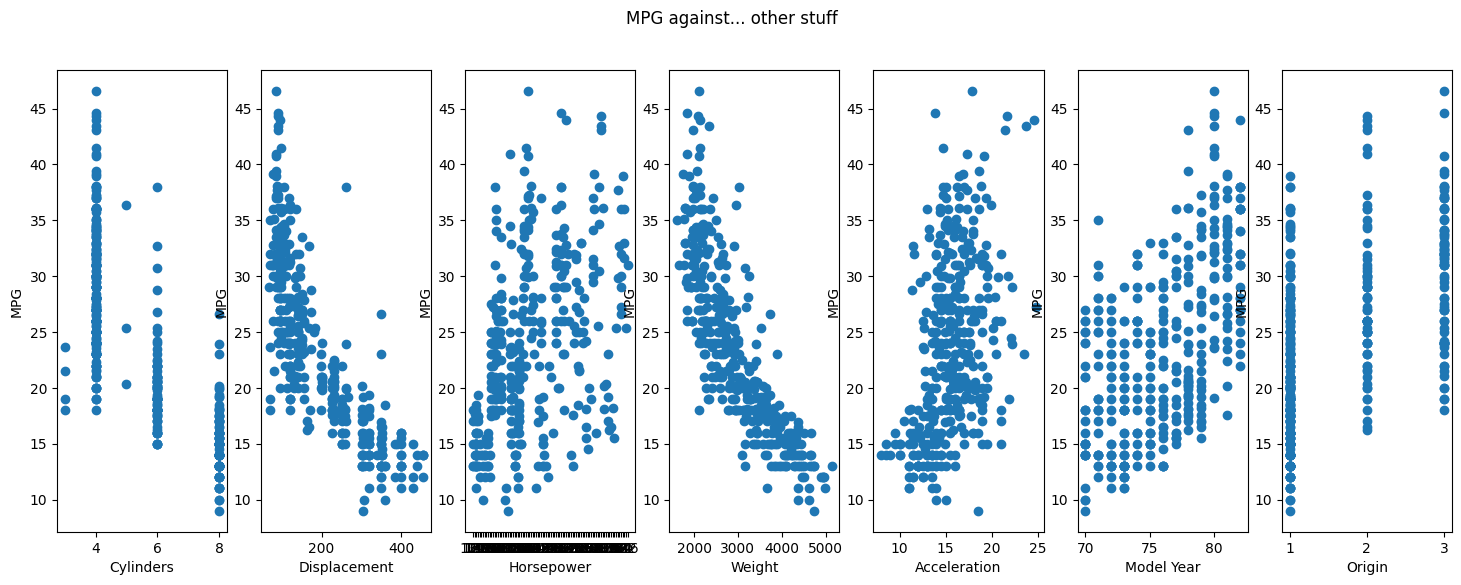

In [70]:
fig, ax = plt.subplots(1, 7, figsize=(18,6))
fig.suptitle("MPG against... other stuff")
ax[0].plot(original['cylinders'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('Cylinders')
ax[0].set_ylabel('MPG')

ax[1].plot(original['displacement'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('Displacement')
ax[1].set_ylabel('MPG')

ax[2].plot(original['horsepower'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Horsepower')
ax[2].set_ylabel('MPG')

ax[3].plot(original['weight'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[3].set_xlabel('Weight')
ax[3].set_ylabel('MPG')

ax[4].plot(original['acceleration'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[4].set_xlabel('Acceleration')
ax[4].set_ylabel('MPG')

ax[5].plot(original['model_year'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[5].set_xlabel('Model Year')
ax[5].set_ylabel('MPG')

ax[6].plot(original['origin'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[6].set_xlabel('Origin')
ax[6].set_ylabel('MPG')

## 2. Cleaning the data

In [71]:
original['horsepower'] = pd.to_numeric(original['horsepower'], errors='coerce')
horse_med = original['horsepower'].median()
original['horsepower'] = original['horsepower'].fillna(horse_med)

### Plotting the plots again with cleaned horsepower

Text(0, 0.5, 'MPG')

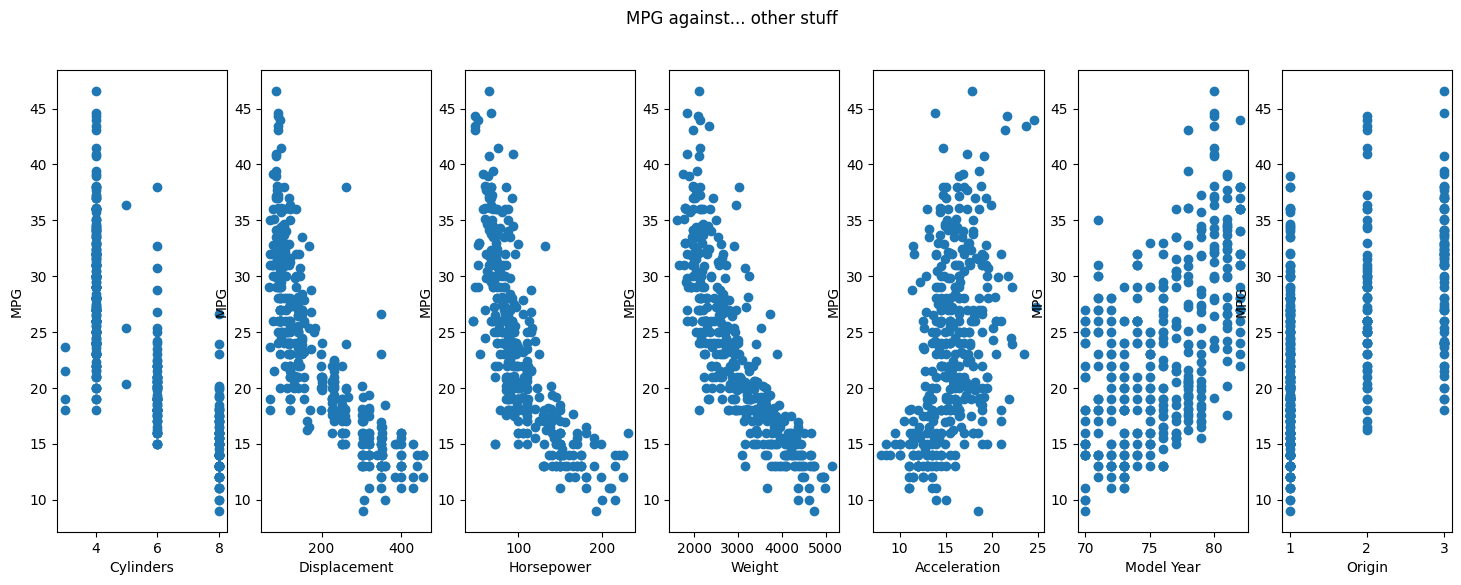

In [72]:
fig, ax = plt.subplots(1, 7, figsize=(18,6))
fig.suptitle("MPG against... other stuff")
ax[0].plot(original['cylinders'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('Cylinders')
ax[0].set_ylabel('MPG')

ax[1].plot(original['displacement'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('Displacement')
ax[1].set_ylabel('MPG')

ax[2].plot(original['horsepower'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Horsepower')
ax[2].set_ylabel('MPG')

ax[3].plot(original['weight'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[3].set_xlabel('Weight')
ax[3].set_ylabel('MPG')

ax[4].plot(original['acceleration'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[4].set_xlabel('Acceleration')
ax[4].set_ylabel('MPG')

ax[5].plot(original['model_year'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[5].set_xlabel('Model Year')
ax[5].set_ylabel('MPG')

ax[6].plot(original['origin'], original['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[6].set_xlabel('Origin')
ax[6].set_ylabel('MPG')

## 3. Normalizing the data

In [73]:
tag = '_normalized'
for col in original.columns:
    if col == 'car name':
        continue
    original[col + tag] = (original[col] - original[col].mean()) / original[col].std()
original.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name,mpg_normalized,cylinders_normalized,displacement_normalized,horsepower_normalized,weight_normalized,acceleration_normalized,model_year_normalized,origin_normalized
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,-0.705551,1.496308,1.089233,0.672271,0.630077,-1.293870,-1.625381,-0.714246
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,-1.089379,1.496308,1.501624,1.587959,0.853259,-1.475181,-1.625381,-0.714246
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,-0.705551,1.496308,1.194728,1.195522,0.549778,-1.656492,-1.625381,-0.714246
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,-0.961437,1.496308,1.060461,1.195522,0.546236,-1.293870,-1.625381,-0.714246
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,-0.833494,1.496308,1.041280,0.933897,0.565130,-1.837804,-1.625381,-0.714246


In [74]:
df = original.copy()

## 4. Fit a linear regression model with only linear terms

In [75]:
# Fit a linear regression model - MPG = a0*cylinders + a1*displacement + a2*horsepower + a3*weight + a4*acceleration + a5*model year + a6*origin
model = smf.ols(formula='mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + weight_normalized + acceleration_normalized + model_year_normalized + origin_normalized', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        20:02:40   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Std of residuals:  3.3031516852343703


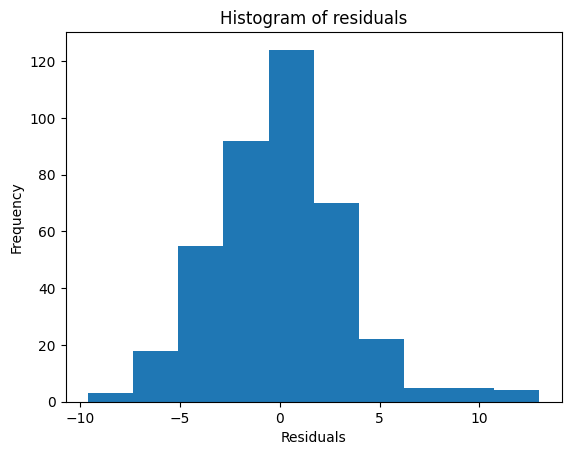

In [76]:
df['mpg_pred'] = model.predict()
df['mpg_resid'] = df['mpg'] - df['mpg_pred']
plt.hist(df['mpg_resid'])
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
print("Std of residuals: ", np.std(df['mpg_resid']))

## 5. Remove insignificant terms and refit the model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        20:02:40   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

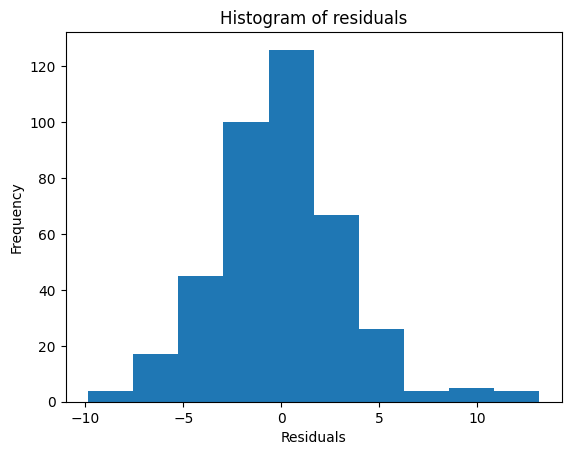

In [77]:
# Remove factors with P-value > 0.05
model = smf.ols(formula='mpg ~ displacement_normalized + weight_normalized + model_year_normalized + origin_normalized', data=df).fit()

print(model.summary())

df['mpg_pred_2'] = model.predict()
df['mpg_resid_2'] = df['mpg'] - df['mpg_pred_2']
plt.hist(df['mpg_resid_2'])
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
print("Std of residuals: ", np.std(df['mpg_resid_2']))

## 6. Add interaction terms

In [78]:
df = original.copy()  # Reset df

In [79]:
# adding interaction terms to the linear regression model
terms = ['cylinders_normalized', 'displacement_normalized', 'horsepower_normalized', 'weight_normalized', 'acceleration_normalized', 'model_year_normalized', 'origin_normalized']
interaction_terms = []
for i in range(len(terms)):
    for j in range(i+1, len(terms)):
        interaction_terms.append(terms[i] + '*' + terms[j])
equation = 'mpg ~ ' + "+".join(terms) + "+" + "+".join(interaction_terms)
equation

'mpg ~ cylinders_normalized+displacement_normalized+horsepower_normalized+weight_normalized+acceleration_normalized+model_year_normalized+origin_normalized+cylinders_normalized*displacement_normalized+cylinders_normalized*horsepower_normalized+cylinders_normalized*weight_normalized+cylinders_normalized*acceleration_normalized+cylinders_normalized*model_year_normalized+cylinders_normalized*origin_normalized+displacement_normalized*horsepower_normalized+displacement_normalized*weight_normalized+displacement_normalized*acceleration_normalized+displacement_normalized*model_year_normalized+displacement_normalized*origin_normalized+horsepower_normalized*weight_normalized+horsepower_normalized*acceleration_normalized+horsepower_normalized*model_year_normalized+horsepower_normalized*origin_normalized+weight_normalized*acceleration_normalized+weight_normalized*model_year_normalized+weight_normalized*origin_normalized+acceleration_normalized*model_year_normalized+acceleration_normalized*origin_n

## 7. Refit the model with interaction terms from part 6

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        20:02:41   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

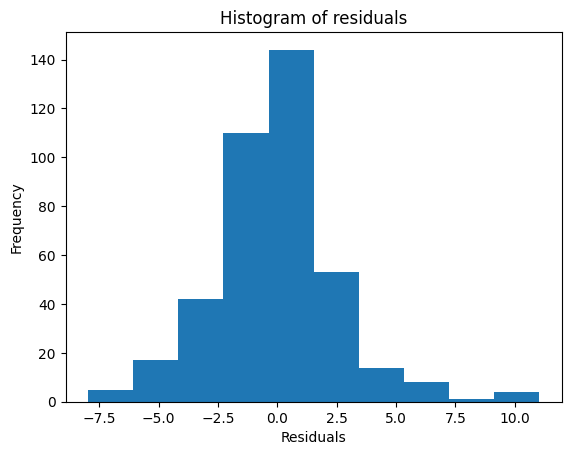

In [80]:
model = smf.ols(formula=equation, data=df).fit()

print(model.summary())

df['mpg_pred'] = model.predict()
df['mpg_resid'] = df['mpg'] - df['mpg_pred']
plt.hist(df['mpg_resid'])
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
print("Std of residuals: ", np.std(df['mpg_resid']))

What interaction terms are significant? Is this model better?

Yes! This model is better. The R-squared value is higher, and the standard deviation of the residuals is lower. Also, just looking at the histogram, you can see that more of the residuals are closer to 0, which is what we want!

To answer which interaction terms are significant, the line of code below will show that.

In [88]:
model.pvalues[model.pvalues <= 0.05].index.to_list()[5:]

['displacement_normalized:weight_normalized',
 'displacement_normalized:model_year_normalized',
 'acceleration_normalized:model_year_normalized',
 'acceleration_normalized:origin_normalized',
 'model_year_normalized:origin_normalized']

## 8. Remove insignificant terms and refit the model from part 7

In [81]:
pval_series = model.pvalues
insignificant = pval_series[pval_series > 0.05].index.tolist()
insignificant

['cylinders_normalized',
 'displacement_normalized',
 'acceleration_normalized',
 'cylinders_normalized:displacement_normalized',
 'cylinders_normalized:horsepower_normalized',
 'cylinders_normalized:weight_normalized',
 'cylinders_normalized:acceleration_normalized',
 'cylinders_normalized:model_year_normalized',
 'cylinders_normalized:origin_normalized',
 'displacement_normalized:horsepower_normalized',
 'displacement_normalized:acceleration_normalized',
 'displacement_normalized:origin_normalized',
 'horsepower_normalized:weight_normalized',
 'horsepower_normalized:acceleration_normalized',
 'horsepower_normalized:model_year_normalized',
 'horsepower_normalized:origin_normalized',
 'weight_normalized:acceleration_normalized',
 'weight_normalized:model_year_normalized',
 'weight_normalized:origin_normalized']

In [95]:
# make our insignificant terms into a list of strings that follow the same format as before
insignificant = [i.replace(":","*") for i in insignificant]
# Remove insignificant terms
terms_adjusted = [i for i in terms if i not in insignificant]
interaction_terms_adjusted = [i for i in interaction_terms if i not in insignificant]
equation = 'mpg ~ ' + "+".join(terms_adjusted) + "+" + "+".join(interaction_terms_adjusted)
equation

'mpg ~ horsepower_normalized+weight_normalized+model_year_normalized+origin_normalized+displacement_normalized*weight_normalized+displacement_normalized*model_year_normalized+acceleration_normalized*model_year_normalized+acceleration_normalized*origin_normalized+model_year_normalized*origin_normalized'

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          7.68e-169
Time:                        00:37:46   Log-Likelihood:                -963.66
No. Observations:                 398   AIC:                             1951.
Df Residuals:                     386   BIC:                             1999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Text(0, 0.5, 'Frequency')

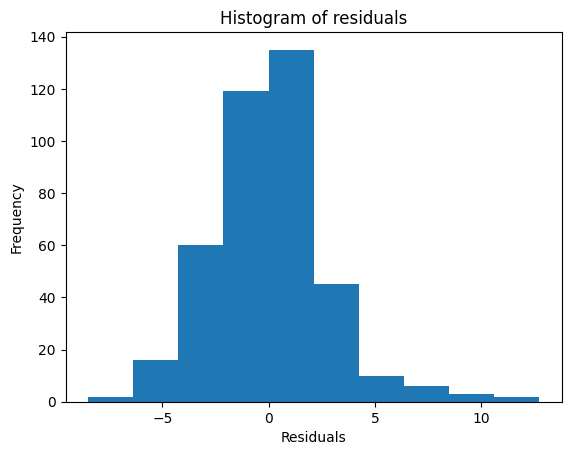

In [98]:
model_adjusted = smf.ols(formula=equation, data=df).fit()

print(model_adjusted.summary())

df['mpg_pred_2'] = model_adjusted.predict()
df['mpg_resid_2'] = df['mpg'] - df['mpg_pred_2']
plt.hist(df['mpg_resid_2'])
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [99]:
print("Std of residuals: ", np.std(df['mpg_resid_2']))

Std of residuals:  2.724566776685811


That's the standard deviation of the last residual. It performed a bit worse than the model in step 7, but it was also given far less data so I believe that is expected.